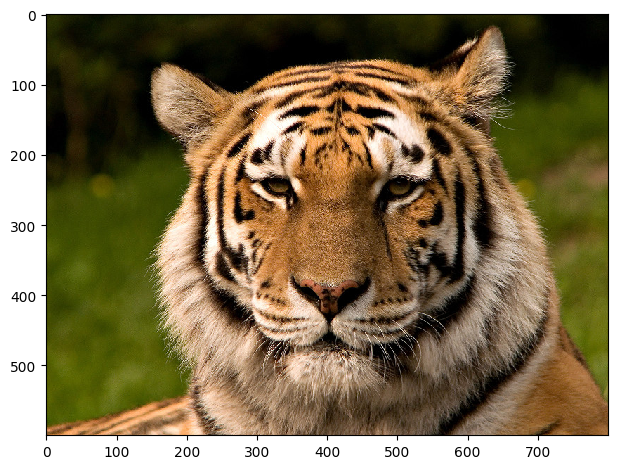

In [99]:
import numpy as numpy
from skimage.io import imread, imshow, imsave
import skimage as skimage
from skimage import img_as_ubyte
from skimage import img_as_float
from numpy import histogram
img = imread ('tiger-color.png')
imshow(img)

In [100]:
img = img_as_float (img)
R = img [:,:,0]
G = img [:,:,1]
B = img [:,:,2]
Y =  0.2126*R+0.7152*G+0.0722*B
U = -0.0999*R-0.3360*G+0.4360*B
V =  0.6150*R-0.5586*G-0.0563*B

In [101]:
k = round (img.shape[0]*img.shape[1]*0.05)
Y_sort = sorted(numpy.ravel(Y))
Y_min = Y_sort [k]
Y_max = Y_sort [len(Y_sort)-k]
Y_new = (Y - Y_min)*(1/(Y_max-Y_min))
Y_new = numpy.clip (Y_new, 0, 1)

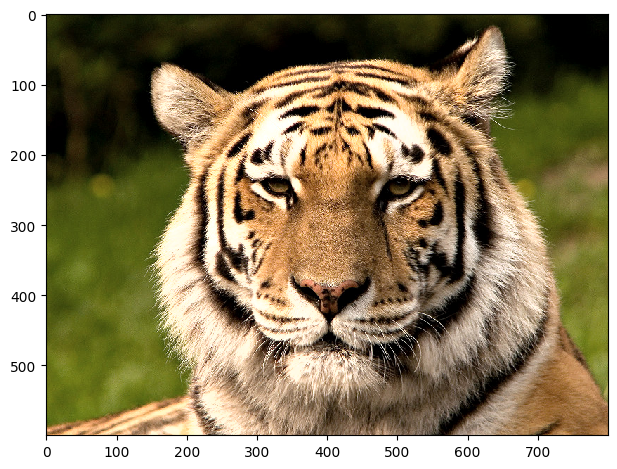

In [102]:
R = numpy.clip (Y_new+1.2803*V, 0, 1)
G = numpy.clip (Y_new-0.2148*U-0.3805*V, 0, 1)
B = numpy.clip (Y_new+2.1279*U, 0, 1)

new_img = img_as_ubyte ( numpy.dstack ((R, G, B)))
imsave ('out_img.png', new_img)
imshow(new_img)